In [1]:
# sources: 
#https://fenicsproject.org/pub/presentations/misc/fenics-presentation-2012-12-05-logg-simula.pdf
#https://jsdokken.com/dolfinx-tutorial/chapter1/fundamentals_code.html

# Solving linear Poisson ODE 

### Poisson equation

$\left\{ 
\begin{array}
    −∆u=f& \mbox{in Ω}\\
    u=0& \mbox{on ∂Ω (Dirichlet boundary conditions)}\\
  \end{array}
  \right.$

### Variational form

In [2]:
# Initialize spatial discretization of the PDE

Find u∈V such that: 
 
$\left\{ 
\begin{array}
    &\int_{Ω}^{} ∇u·∇v dx = \int_{Ω}^{} f.v dx,& \mbox{∀v∈V}\\
    u=0& \mbox{on ∂Ω (Dirichlet boundary conditions)}\\
  \end{array}
  \right.$

### Principles of resolution with FEM 

The Finite Element Method (ex: FEniCS) provides a solution 'uh' that approximates the real solution 'u'.
The precision of uh depends on the number of basis functions (finite elements) considered and on their on their degree.

- u ~ uh=Σαi.φi. φi are N basis functions used to discretize the spatial domain and solve the equation. φi are choosen to be orthogonal. αi are the new N unknowns at each time step.
- v is choosen as a "test function" equal to φj. It enables to get N independant equations

The Finite Element Method uses the variational form to express the equation into a linear matrix problem: AU = L (linear variational problem in terms of 'u')

# Resolution with FEniCS (Finite Element Method library)

In [3]:
import fenics

### Define domain

In [4]:
mesh = fenics.UnitSquareMesh(32, 32) # FEniCS mesh object

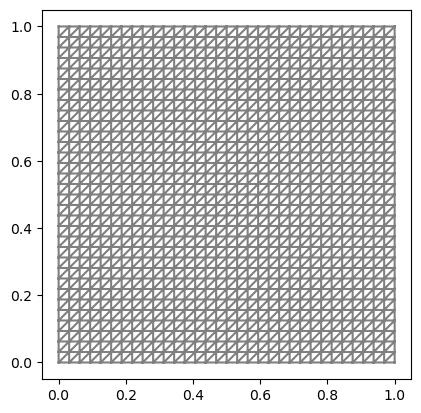

In [5]:
fenics.plot(mesh)

### Define the space of basis functions to discretize the spatial domain

In [6]:
# "Function Space": space of all basis functions (i.e. finite elements) used to approximate the real solution 'u'

In [7]:
V = fenics.FunctionSpace(mesh, "Lagrange", 1) # family of functions --> Lagrange; degree --> 1 (linear polynome)

### Trial and test functions

In [8]:
# "Function": composition of the finite basis functions in V

In [9]:
u_trial = fenics.TrialFunction(V) # trial function standing for 'uh' approximation -->  Σαi*φi 
v_test = fenics.TestFunction(V) # test function -->  φj

### Variational form

#### bilinear form a(u_trial,v_test)

In [10]:
# a(u_trial,v_test) is part of the variational form depending on the 'uh' solution

In [11]:
a = fenics.dot(fenics.grad(u_trial), fenics.grad(v_test)) * fenics.dx

#### linear form L(v_test) 

In [12]:
# L(v_test) is part of the variational form independant from the 'uh' solution

In [21]:
import math
pi = math.pi
f = fenics.Expression('(pow(x[0] - xCenter, 2) + pow(x[1] - yCenter, 2))/pow(width, 2)', xCenter=0.8, yCenter=0.8, width=0.1, degree=2)
L = f * v_test * fenics.dx

### Define Dirichlet boundary conditions (part of the problem)

In [22]:
bc = fenics.DirichletBC (V, 0.0, fenics.DomainBoundary())

### Solver

In [23]:
uh = fenics.Function(V) # 'uh' is the approximation with FEM/FEniCS of real solution 'u'
fenics.solve(a==L, uh, bc) # solve linear variational problem

Solving linear variational problem.


### Display solution 

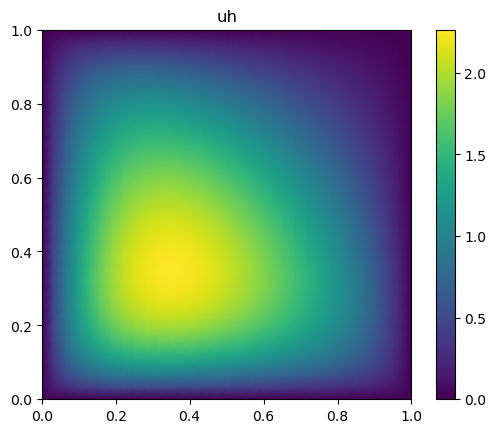

In [24]:
fenics.plot(uh, title='uh')

import matplotlib.pyplot as plt
c = fenics.plot(fenics.interpolate(uh, V), mode='color')
plt.colorbar(c)
plt.show()